In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

DATASET'İ İNCELEME

In [ ]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [131]:
df["Air Quality"]

0        Moderate
1        Moderate
2        Moderate
3            Good
4            Good
          ...    
4995    Hazardous
4996     Moderate
4997     Moderate
4998         Good
4999     Moderate
Name: Air Quality, Length: 5000, dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [134]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
#Eksik verilerin kontrolü yapıldı. zaten bi üst satırda kontrol ettim ama bu şekilde de kontrol edilebilir
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)

In [ ]:
# Hiç null değer yok, eksik veri yok, tek kategorik değer hava kalitesi

In [ ]:
# Kategorik verilerin benzersiz değer analizi yapıldı. Beklendiği gibi. Alt satırda da aslında kontrol edilebilir. Ben bu şekilde yazmak istedim
df["Air Quality"].unique()

In [ ]:
"""
Sayısal değişkenlerin betimleyici istatistikleri
"""

In [133]:
# Tranpose ile okunulabilirliği artırdım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [ ]:
# mean: ortalama,
# std: standart sapma,
# %50: medyan

In [ ]:
"""
Korelasyon analizi ile değişkenler arası ilişkilerin incelenmesi.
"""

In [ ]:
"""
korelasyonlarına bakalım ama air quality kategorik olduğu için kabul etmiyor.
o yüzden x ve y olarak ayırıp x korelasyonunu hesaplayacağım.
"""

In [ ]:
X = df.drop(["Air Quality"], axis=1)
y = df["Air Quality"]

In [ ]:
correlation_matrix = X.corr()
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=.7)
plt.show()

In [ ]:
"""
1) PM10 ile PM2.5 arasında 0.9'dan fazla ilişki olduğu için boyut indirgeme yaparken birini eleyebiliriz
2) CO ve endüstriyel alana yakınlık arasında negatif bir correlasyon var
3) ilişkiler: PM10-PM2.5, CO-ProximityIA(-0.71), CO-NO2(0.71), CO-Temperature(0.69), CO-SO2(0.68), Proximity-NO2(-0.61)
"""

In [ ]:
"""
Bütün özniteliklerin tek tek kutu grafiğini çizdirmeyeceğim, medyan ile ortalaması arasınd fark olanları ayrı çizdireceğim. Bunlar: PM2.5, PM10, ek olarak SO2'yi de çizdirmek istiyorum. bi tane de toplu çizdirip genel fikrim olsun istiyorum
"""

In [ ]:
"""
Aykırı değerlerin kutu grafikleri ile tespiti.
"""

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['PM2.5'])
plt.title('PM2.5 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['PM10'])
plt.title('PM10 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['SO2'])
plt.title('SO2 Kutu Grafiği')
plt.xlabel('DEĞERLER')
plt.show()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Temperature", "Humidity", "PM2.5", "PM10" , "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas"]])
plt.title("tüm kutu grafikleri")
plt.xlabel("değerler")
plt.show()

In [ ]:
"""
Hedef değişkenin dağılımı ve dengesizlik analizi
"""

In [ ]:
target_counts = y.value_counts()
print(target_counts)
print(target_counts / len(df) * 100)  # Yüzdelik dağılım


In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Air Quality')
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [ ]:
"""
Genel Yorum:
- Eksik verimiz yok.
- Kategorisel veri olarak sadece air quality var. sayısallaşrtıracağım.
- 2 öznitelikte aykırı değerler yüksek. düzeltilecek
- 1 tane çok yüksek, 1 tane yüksek korelasyon ilişkisi var. öznitelik çıkarabilirim.
- Hedef değişkende dengesizlik var. ekleme yapacağım
- Min maks'larda olamayacak değerler var. Örneğin humidity 128. Herkes bilir 128 çok yüksek bir miktar. Bunları kesinlikle kaldıracağım
"""

Özellik Mühendisliği ve Ön İşleme

In [ ]:
"""
kategorik olan hedef değişlenimizi pandasın dummies kütüphanesi ile sayısallaştıracağım
"""

In [ ]:
df.head(10)

In [ ]:
df.head(10)

In [ ]:
"""
Alttaki ikisini de deneyeceğim hangisi daha iyi sonuç verecekse ona göre karar vereceğim. pd.Series ile ordinal encoding'i deneyeceğim.
"""

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df["Air Quality"].unique()

In [ ]:
quality = [['Hazardous', 'Poor', 'Moderate', 'Good']]


In [ ]:
print(y)

In [ ]:
print(df["Air Quality"])

In [ ]:
y_ordinal = OrdinalEncoder(categories=quality)
y = y_ordinal.fit_transform(df[["Air Quality"]])

In [ ]:
print(y_ordinal)


In [ ]:
print(y)

In [ ]:
df.head(3)

In [ ]:
# df = pd.get_dummies(df, columns=['Air Quality'])

In [ ]:
"""
Sayısal verilerin standardizasyonu (StandardScaler)
"""

In [ ]:
"""
CO ve denisty değerleri diğer verilerle uyumsuz olduğu için standart scaler uygulayacağım
"""

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(X_scaled)
plt.title("standardize sonrası boxplotlar")
plt.show()

In [ ]:

outlier_mask = (np.abs(X_scaled) > 6).any(axis=1)
"""
mask_2 = np.abs(X_scaled[:,2]) > 2.0
mask_3 = np.abs(X_scaled[:,3]) > 2.2
"""

In [ ]:

combined_mask = ((np.abs(X_scaled) > 3).any(axis=1)) # | mask_2 | mask_3
X_scaled = X_scaled[~combined_mask]
y = y[~combined_mask]


In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(X_scaled)

In [ ]:
"""
#varyansı düşük diye pm2.5'i çıkaracağım
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = X_scaled.drop(columns=["PM2.5"])
"""

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Kullanılan özellikler:", X_scaled_df.columns.tolist())
print(f"Özellik sayısı: {X_scaled_df.shape[1]}")


In [ ]:
# Şimdi veri üreterek hedef değişkeni dengeleyeceğim
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_scaled_df, y)

In [ ]:
print("Orijinal dağılım:")
print(pd.Series(y.ravel()).value_counts())
print("\nSMOTE sonrası:")
print(pd.Series(y_balanced).value_counts())

In [ ]:
"""
şunu fark ettim: verilerin y kategorilerinden iyiden kötüye doğru azalan sayısı arttı. yani en az good'tan en fazla hazardoustan gitti.
"""

In [ ]:
print(x_balanced)

In [ ]:
print("İlk 20 eleman:", y_balanced[:20])


In [ ]:
"""
from sklearn.manifold import TSNE

# Sadece 2D görselleştirme için
tsne = TSNE(n_components=2,
           perplexity=30,    # Komşuluk boyutu
           random_state=42,
           max_iter=1000)

X_tsne = tsne.fit_transform(x_balanced)

# Görselleştir
plt.figure(figsize=(7,4))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_balanced, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE ile Görselleştirme')

# Sınıflar kümelenmişse iyi ayrım var demektir
"""

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_reduced = pca.fit_transform(x_balanced)

In [ ]:
#PCA'den sonra tekrar train test split yapcam
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
explained = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained))
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.grid()
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_balanced, cmap='viridis')  # y_balanced varsa etiket olarak
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile Görselleştirme')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


LOGISTIC REGRESSION

In [ ]:
reg = LogisticRegression()
model = reg.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

In [ ]:
enet_logistic = LogisticRegression(
    penalty='elasticnet',
    C=2.0,              # alpha'nın tersi (1/alpha)
    l1_ratio=0.5,       # L1 ve L2 karışımı
    solver='saga',      # ElasticNet için gerekli
    max_iter=1000)

enet_logistic.fit(X_train, y_train)
y_pred_train_enet = enet_logistic.predict(X_train)
y_pred_test_enet = enet_logistic.predict(X_test)

In [ ]:
train_accuracy_enet = accuracy_score(y_train, y_pred_train_enet)
print(f"Elastic Net Logistic - Eğitim Doğruluğu: {train_accuracy_enet:.4f}")
test_accuracy_enet = accuracy_score(y_test, y_pred_test_enet)
print(f"Elastic Net Logistic - Test Doğruluğu: {test_accuracy_enet:.4f}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

In [ ]:
print("\n=== ELASTIC NET KARŞILAŞTIRMASI ===")
print(f"Logistic Regression    - Test Accuracy: {test_accuracy:.4f}")
print(f"Elastic Net Logistic   - Test Accuracy: {test_accuracy_enet:.4f}")
print(f"Logistic Regression    - Training Accuracy: {train_accuracy:.4f}")
print(f"Elastic Net Logistic   - Training Accuracy: {train_accuracy_enet:.4f}")

In [ ]:
"""
Overfitting yok.
"""

DECISION TREE

In [ ]:
for i in range(8,18) :
    tree = DecisionTreeClassifier(random_state=42, max_depth= i)
    model = tree.fit(X_train, y_train)

    rf_y_pred_train = model.predict(X_train)
    rf_y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, rf_y_pred_train)
    #print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
    test_accuracy = accuracy_score(y_test, rf_y_pred_test)
    #print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
    min = 2
    if train_accuracy - test_accuracy < min:
        min = train_accuracy - test_accuracy
        print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
        print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
        print(f"min: {min}, /n i {i}")

In [ ]:
tree = DecisionTreeClassifier(random_state=42, max_depth= 12)
model = tree.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

In [ ]:
"""
train sonucundan anlaşılıyor ki maX depth sayısı vermediğimizde modelimiz ezberlemiş. o zaman dal kısaltalım. kısalttım ve max depth 12'nin local optima olduğunu düşünüyorum
"""

RANDOM FOREST

In [ ]:

for i in range(6,12):
    forest = RandomForestClassifier(random_state=42, max_depth=i)
    model = forest.fit(X_train, y_train)
    rf_y_pred_train = model.predict(X_train)
    rf_y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, rf_y_pred_train)
    #print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
    test_accuracy = accuracy_score(y_test, rf_y_pred_test)
    #print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
    min = 2
    if train_accuracy - test_accuracy < min:
        min = train_accuracy - test_accuracy
        print(f"Eğitim Verisi Doğruluğu (Training Accuracy): i:{i} {train_accuracy:.4f}")
        print(f"Test Verisi Doğruluğu (Testing Accuracy): i:{i} {test_accuracy:.4f}")
        print(f"min: {min}, /n i {i}")



In [ ]:
"""
Burada max depthe karar vermek için for döngüsüne aldım 11 mantıklı geldi.
"""

In [ ]:
forest = RandomForestClassifier(random_state=42, max_depth=11)
model = forest.fit(X_train, y_train)
rf_y_pred_train = model.predict(X_train)
rf_y_pred_test = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, rf_y_pred_train)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, rf_y_pred_test)
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

In [ ]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

SVM

In [ ]:
"""
bizim problemimiz classification olduğu için SVR yapmadım.
"""

In [ ]:
from sklearn.svm import SVC

In [ ]:
#RBF KERNEL
svm = SVC(random_state=42, kernel='rbf', C=1.0, gamma='scale')
model = svm.fit(X_train, y_train)
svm_rbf_pred_train = model.predict(X_train)
svm_rbf_pred_test = model.predict(X_test)

In [ ]:
print("SVM RBF Train Accuracy:", accuracy_score(y_train, svm_rbf_pred_train))
print("SVM RBF Test Accuracy:", accuracy_score(y_test, svm_rbf_pred_test))

In [ ]:
print(classification_report(y_test, svm_rbf_pred_test))
print(confusion_matrix(y_test, svm_rbf_pred_test))

In [ ]:
#LINEAR KERNEL
svm_linear = SVC(random_state=42, kernel='linear', C=1.0)
model_linear = svm_linear.fit(X_train, y_train)
svm_linear_pred_train = model_linear.predict(X_train)
svm_linear_pred_test = model_linear.predict(X_test)

In [ ]:
print("SVM Linear Train Accuracy:", accuracy_score(y_train, svm_linear_pred_train))
print("SVM Linear Test Accuracy:", accuracy_score(y_test, svm_linear_pred_test))

In [ ]:
print(classification_report(y_test, svm_linear_pred_test))
print(confusion_matrix(y_test, svm_linear_pred_test))

In [ ]:
#POLY KERNEL
svm_poly = SVC(random_state=42, kernel='poly', degree=3, C=1.0)
model_poly = svm_poly.fit(X_train, y_train)
svm_poly_pred_train = model_poly.predict(X_train)
svm_poly_pred_test = model_poly.predict(X_test)

In [ ]:
print("SVM Poly Train Accuracy:", accuracy_score(y_train, svm_poly_pred_train))
print("SVM Poly Test Accuracy:", accuracy_score(y_test, svm_poly_pred_test))
print(classification_report(y_test, svm_poly_pred_test))
print(confusion_matrix(y_test, svm_poly_pred_test))

In [ ]:
# Modelleri karşılaştır
models = {
    'SVM RBF': (svm_rbf_pred_train, svm_rbf_pred_test),
    'SVM Linear': (svm_linear_pred_train, svm_linear_pred_test),
    'SVM Poly': (svm_poly_pred_train, svm_poly_pred_test)
}

print("Model Performans Karşılaştırması:")
print("-" * 50)
for name, (train_pred, test_pred) in models.items():
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"{name:15} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train, y_train)
knn_y_pred_train = classifier.predict(X_train)
knn_y_pred_test = classifier.predict(X_test)

In [ ]:
print("Train Accuracy:", accuracy_score(y_train, knn_y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, knn_y_pred_test))
print(classification_report(y_test, knn_y_pred_test))
print(confusion_matrix(y_test, knn_y_pred_test))

KMEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=7, random_state=42)

In [ ]:
kmeans = model.fit(X_train)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train) # PCA ile boyut indirilmiş veriyi kullanma
    wcss.append(kmeans.inertia_)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_train)

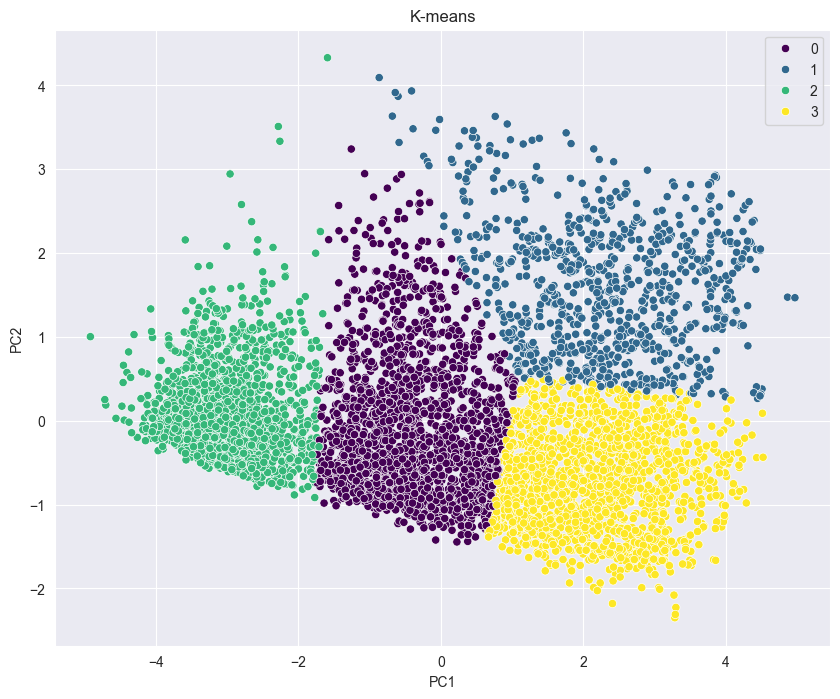

In [159]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clusters, palette='viridis')
plt.title('K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [149]:
from sklearn.metrics import silhouette_score
eps_val = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samp_val = [4,5,6]

In [157]:
results = []
for eps in eps_val:
    for min_samp in min_samp_val:
        dbscan = DBSCAN(eps= eps, min_samples=min_samp)
        clusters_dbscan = dbscan.fit_predict(X_train)
        cls = len(set(dbscan.labels_))
        print(f"eps: {eps}, min_samp: {min_samp}, cls: {cls}")
        # plt.figure(figsize=(6,3))
        # sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clusters_dbscan, palette='viridis')
        # plt.title(f'DBSCAN eps:{eps}, min samples: {min_samp}')
        # plt.xlabel('PC1')
        # plt.ylabel('PC2')
        # plt.show()

eps: 0.1, min_samp: 4, cls: 48
eps: 0.1, min_samp: 5, cls: 15
eps: 0.1, min_samp: 6, cls: 6
eps: 0.2, min_samp: 4, cls: 249
eps: 0.2, min_samp: 5, cls: 132
eps: 0.2, min_samp: 6, cls: 67
eps: 0.3, min_samp: 4, cls: 250
eps: 0.3, min_samp: 5, cls: 174
eps: 0.3, min_samp: 6, cls: 125
eps: 0.4, min_samp: 4, cls: 93
eps: 0.4, min_samp: 5, cls: 63
eps: 0.4, min_samp: 6, cls: 52
eps: 0.5, min_samp: 4, cls: 32
eps: 0.5, min_samp: 5, cls: 27
eps: 0.5, min_samp: 6, cls: 18
eps: 0.6, min_samp: 4, cls: 11
eps: 0.6, min_samp: 5, cls: 8
eps: 0.6, min_samp: 6, cls: 6
eps: 0.7, min_samp: 4, cls: 3
eps: 0.7, min_samp: 5, cls: 3
eps: 0.7, min_samp: 6, cls: 3
eps: 0.8, min_samp: 4, cls: 3
eps: 0.8, min_samp: 5, cls: 3
eps: 0.8, min_samp: 6, cls: 3
eps: 0.9, min_samp: 4, cls: 3
eps: 0.9, min_samp: 5, cls: 2
eps: 0.9, min_samp: 6, cls: 3


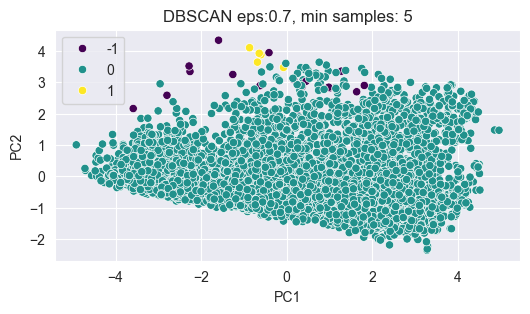

In [158]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clusters_dbscan, palette='viridis')
plt.title(f'DBSCAN eps:{0.7}, min samples: {5}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [160]:
"""
DBSCAN bizim veri setimizde mantıklı değil en yakın cluster sayısı olan 3 olduğu halde dağılımı çok kötü.
"""

'\n'

In [ ]:
# Modelleri karşılaştır
models = {
    'SVM RBF': (svm_rbf_pred_train, svm_rbf_pred_test),
    'SVM Linear': (svm_linear_pred_train, svm_linear_pred_test),
    'SVM Poly': (svm_poly_pred_train, svm_poly_pred_test)
}

print("Model Performans Karşılaştırması:")
print("-" * 50)
for name, (train_pred, test_pred) in models.items():
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"{name:15} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

YORUMLARIM

In [ ]:
"""
Şöyle bir durum var. aykırı değerler vardı evet ama en az good'tan en fazla hazardoustan gitti. Yani aykırı değerleri çıkarmadan da bir ölçüm yapmalıyım.
"""

In [ ]:
"""
AYKIRI DEĞERLERİ ÇIKARDIĞIMDA BAŞARI ORANI DÜŞMÜŞTÜ. ben de sadece gerçekten çok aykırıları çıkarıdım.
"""

In [ ]:
"""
SVM'E BAKMAYI UNUTMA.
"""

In [ ]:
"""
Hem manuel boyut indirgeme yapıp hem de PCA yapmak mantıklı değil. Ayrıca kolon sayımız az PCA yapmasak da olabilir ama manuel olarak PM2.5'i kaldıracağımıza PCA kullanabiliriz.
"""

In [ ]:
# Tüm modellerin test seti doğruluklarını bir sözlükte toplama
final_results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_test),
    'Decision Tree': accuracy_score(y_test, tree.predict(X_test)),
    'Random Forest': accuracy_score(y_test, forest.predict(X_test)),
    'SVM RBF': accuracy_score(y_test, svm_rbf_pred_test),
    'SVM Linear': accuracy_score(y_test, svm_linear_pred_test),
    'SVM Poly': accuracy_score(y_test, svm_poly_pred_test),
    'KNN': accuracy_score(y_test, knn_y_pred_test)
}

# Sonuçları bir DataFrame'e dönüştürme ve sıralama
results_df = pd.DataFrame(final_results.items(), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n--- Model Performans Karşılaştırma Tablosu (Test Seti) ---")
print(results_df)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Makine Öğrenmesi Modellerinin Doğruluk Oranları')
plt.ylabel('Doğruluk (%)')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.show()